In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\User\Downloads\rainfall in india 1901-2015.csv")
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


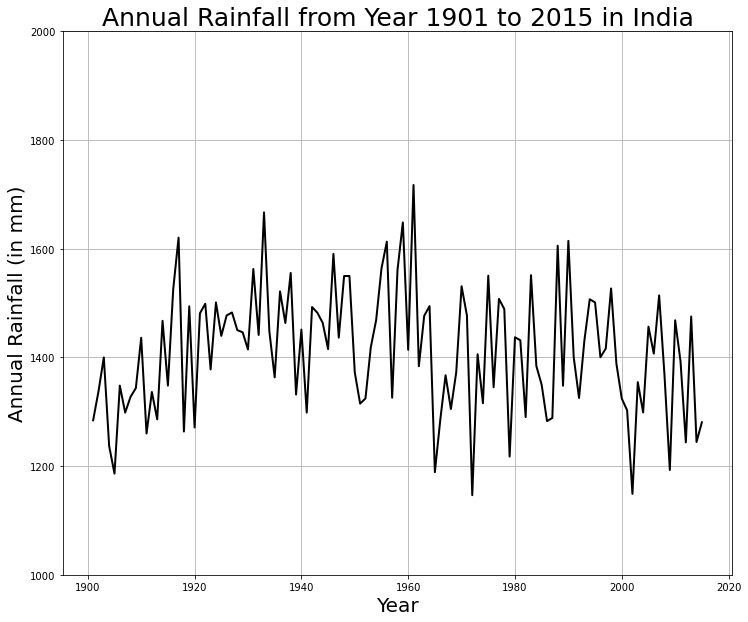

In [3]:
data.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,2000),color='k',linestyle='-',linewidth=2,figsize=(12,10))
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall from Year 1901 to 2015 in India',fontsize=25)

plt.grid()


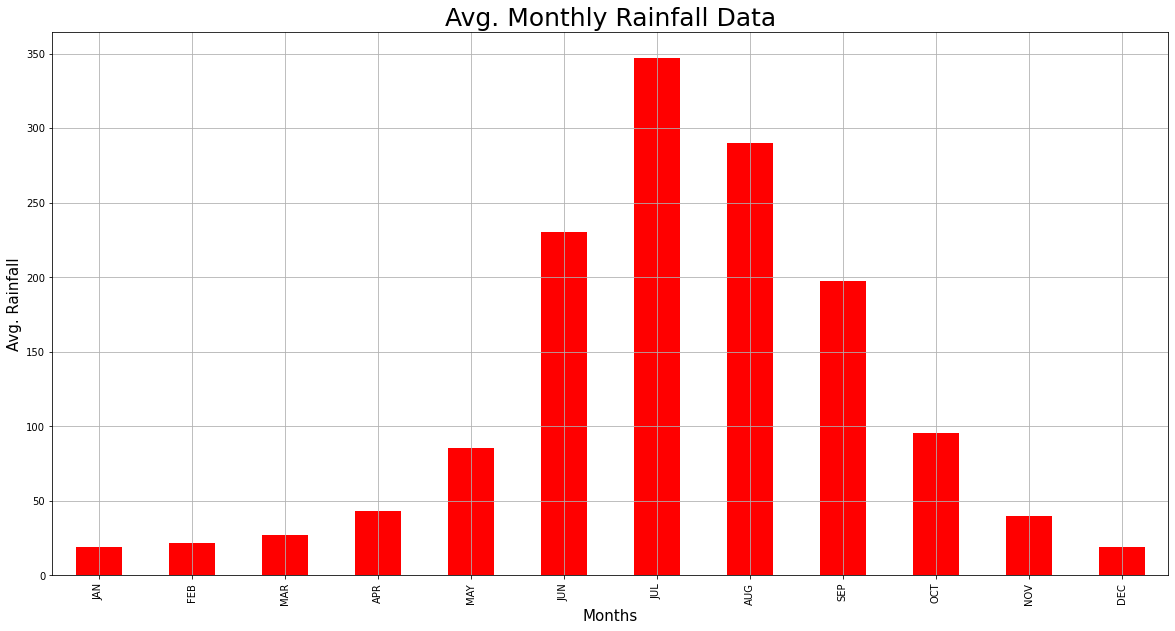

In [4]:
plt.figure(figsize=(20,10))
data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC']].mean().plot(kind= 'bar', color='red')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Avg. Rainfall',fontsize=15)
plt.title('Avg. Monthly Rainfall Data',fontsize=25)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Highest Rainfall year Data of States')

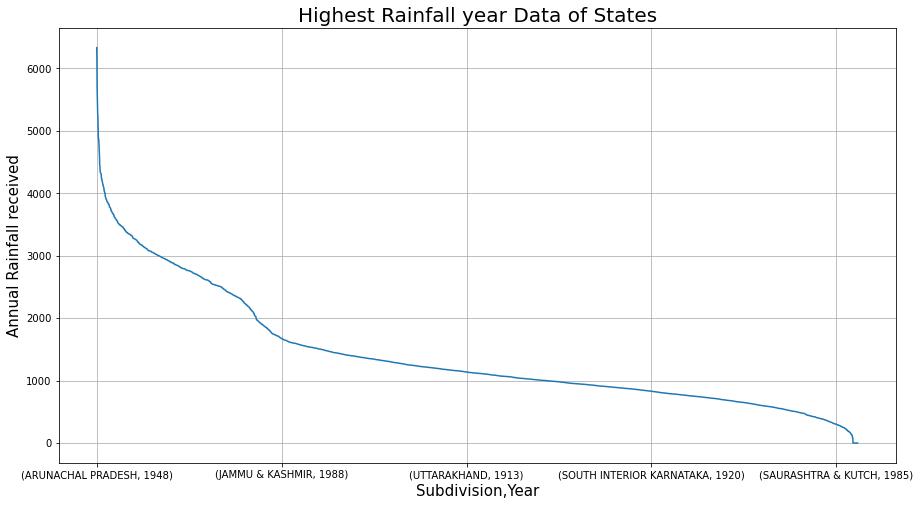

In [5]:
plt.figure(figsize=(15,8))
data.groupby(['SUBDIVISION','YEAR'])['ANNUAL'].sum().sort_values(ascending=False).plot()
plt.grid()
plt.xlabel("Subdivision,Year",fontsize=15)
plt.ylabel("Annual Rainfall received",fontsize=15)
plt.title('Highest Rainfall year Data of States',fontsize=20)

,Total,Percent
ANNUAL,26,0.006317
Oct-Dec,13,0.003158
NOV,11,0.002672
Jun-Sep,10,0.002430
DEC,10,0.002430


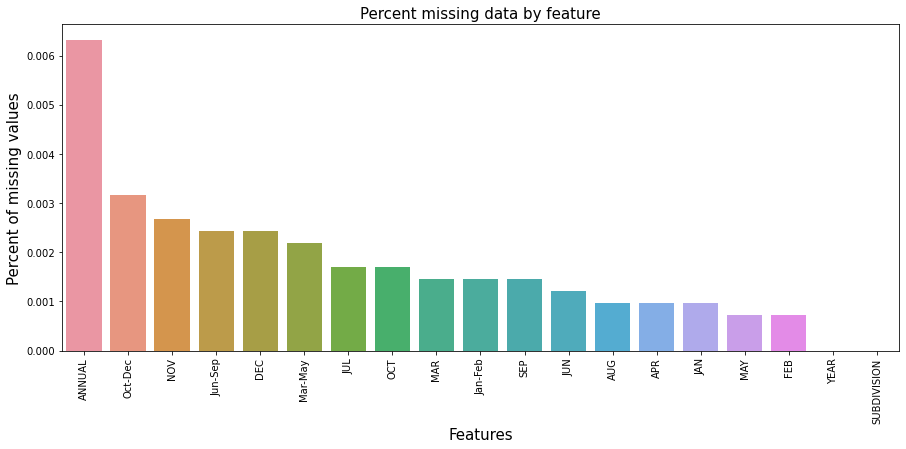

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [7]:
groups = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
am=groups.get_group(('ASSAM & MEGHALAYA'))
am.head()

C:\Users\User\anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
207,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2
208,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3
209,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3
210,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5
211,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8


In [8]:
am=am.melt(['YEAR']).reset_index()
am.head()

,index,YEAR,variable,value
0,0,1901,JAN,27.1
1,1,1902,JAN,9.3
2,2,1903,JAN,19.9
3,3,1904,JAN,11.1
4,4,1905,JAN,19.9


In [9]:
dfam= am[['YEAR','variable','value']].sort_values(by=['YEAR'])
dfam.head()

,YEAR,variable,value
0,1901,JAN,27.1
575,1901,JUN,524.9
345,1901,APR,223.0
690,1901,JUL,430.6
805,1901,AUG,464.1


In [10]:
dfam.columns=['YEAR','Month','avg_rainfall']

In [11]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
dfam['Month']=dfam['Month'].map(d)
dfam.head(12)

,YEAR,Month,avg_rainfall
0,1901,1,27.1
575,1901,6,524.9
345,1901,4,223.0
690,1901,7,430.6
805,1901,8,464.1
230,1901,3,30.6
1265,1901,12,1.2
920,1901,9,291.4
115,1901,2,19.5
1035,1901,10,163.7


In [12]:
dfam['Date']=pd.to_datetime(dfam.assign(Day=1).loc[:,['YEAR','Month','Day']])
dfam.sort_values(by=['Date'], inplace=True, ascending=True)
dfam.head(12)

,YEAR,Month,avg_rainfall,Date
0,1901,1,27.1,1901-01-01
115,1901,2,19.5,1901-02-01
230,1901,3,30.6,1901-03-01
345,1901,4,223.0,1901-04-01
460,1901,5,207.0,1901-05-01
575,1901,6,524.9,1901-06-01
690,1901,7,430.6,1901-07-01
805,1901,8,464.1,1901-08-01
920,1901,9,291.4,1901-09-01
1035,1901,10,163.7,1901-10-01


In [13]:
dfam.set_index('Date',inplace=True)
dfam

,YEAR,Month,avg_rainfall
Date,,,
1901-01-01,1901,1,27.1
1901-02-01,1901,2,19.5
1901-03-01,1901,3,30.6
1901-04-01,1901,4,223.0
1901-05-01,1901,5,207.0
...,...,...,...
2015-08-01,2015,8,590.9
2015-09-01,2015,9,279.9
2015-10-01,2015,10,62.6


In [14]:
dfam = dfam.drop(['YEAR','Month'],1)

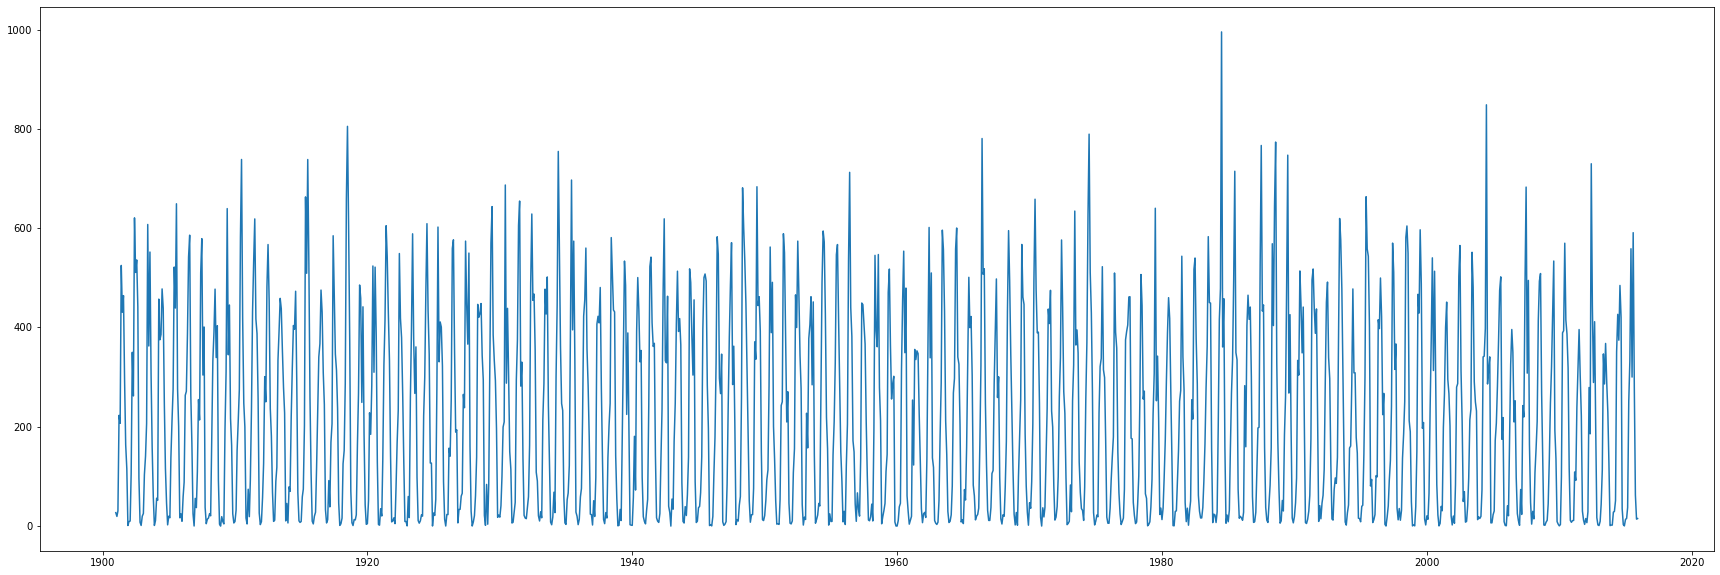

In [15]:
plt.figure(figsize=(30,10))
plt.plot(dfam)
plt.show()

In [16]:
def replace_missing (attribute):
    return attribute.interpolate(inplace=True)

In [17]:
seriesam=dfam
seriesam.head()

,avg_rainfall
Date,
1901-01-01,27.1
1901-02-01,19.5
1901-03-01,30.6
1901-04-01,223.0
1901-05-01,207.0


In [18]:
# Outlier detection
up_b = dfam['avg_rainfall'].mean() + 2*dfam['avg_rainfall'].std()
low_b = dfam['avg_rainfall'].mean() - 2*dfam['avg_rainfall'].std()

# Replace outlier by interpolation 
dfam.loc[dfam['avg_rainfall'] > up_b, 'avg_rainfall'] = np.nan
dfam.loc[dfam['avg_rainfall'] < low_b, 'avg_rainfall'] = np.nan
dfam['avg_rainfall'].interpolate(inplace=True)

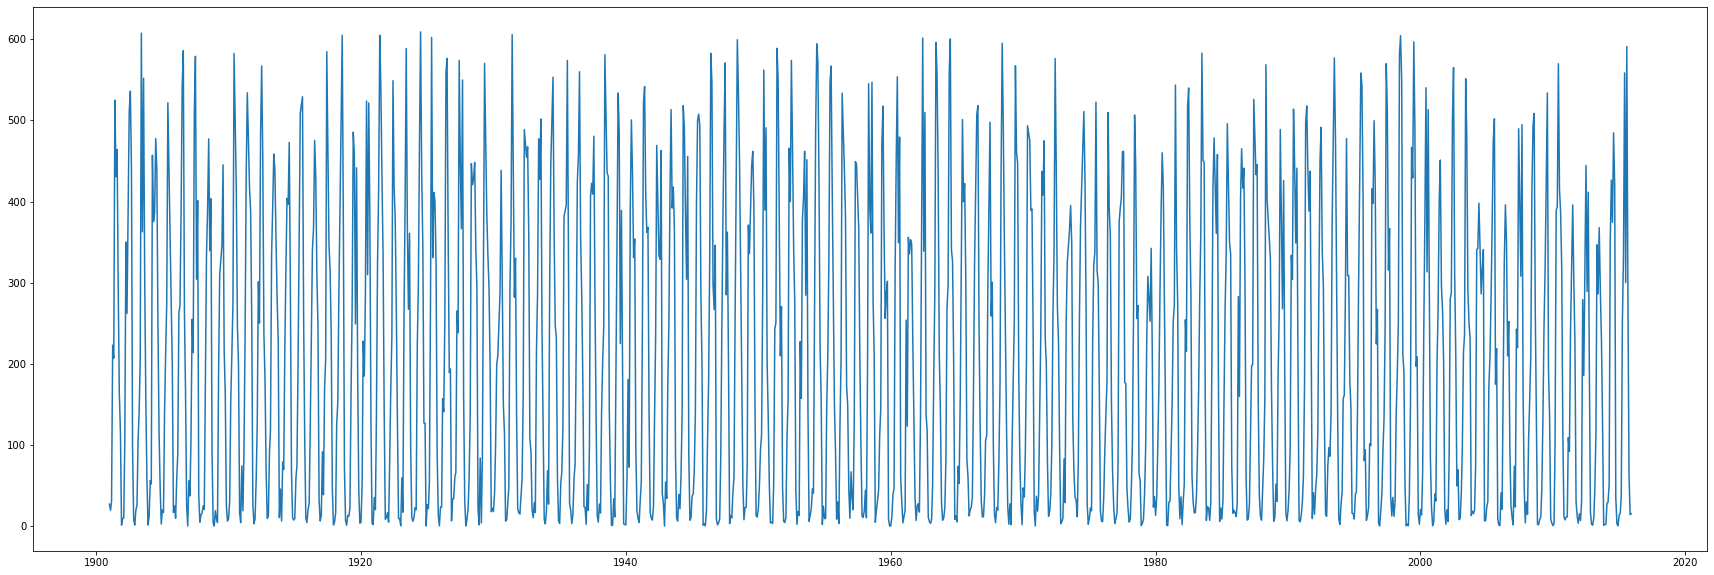

In [19]:
plt.figure(figsize=(30,10))
plt.plot(seriesam)
plt.show()